<a href="https://colab.research.google.com/github/xodud5654/PDM05/blob/main/py-tensorflow/DL2-CNN/dl2_03_fmnist_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of fmnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
    

***
- ## Traget: Find the best model of fmnist dataset
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## dataset: fashion_mnist
- (60000, 28, 28), train
- (10000, 28, 28), test
- grayscale images of items of 10 types of clothings, such as shoes, t-shirts, dresses, and more.
- class names
> class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- DL of fmnist
> https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/


## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.7.0


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape   # one hot 결과 확인

((60000,), (60000, 10))

### Display fashions
- one random fashion
- 10 representative fashions

30231


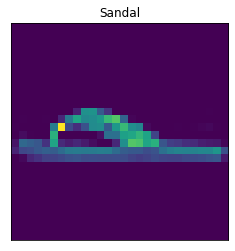

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

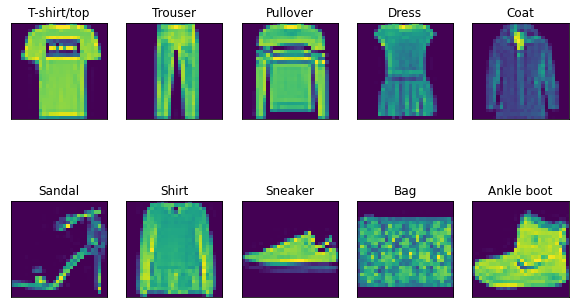

In [ ]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, 
                kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
mc_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=5, 10, 20, 50

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =100, 
         callbacks=[mc_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
600/600 [==============================] - 36s 11ms/step - loss: 0.5305 - accuracy: 0.8087 - val_loss: 0.3590 - val_accuracy: 0.8723
Epoch 2/500
600/600 [==============================] - 6s 9ms/step - loss: 0.3435 - accuracy: 0.8767 - val_loss: 0.3144 - val_accuracy: 0.8836
Epoch 3/500
600/600 [==============================] - 6s 9ms/step - loss: 0.2930 - accuracy: 0.8937 - val_loss: 0.2921 - val_accuracy: 0.8940
Epoch 4/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2643 - accuracy: 0.9031 - val_loss: 0.2694 - val_accuracy: 0.8998
Epoch 5/500
600/600 [==============================] - 6s 9ms/step - loss: 0.2418 - accuracy: 0.9116 - val_loss: 0.2698 - val_accuracy: 0.9030
Epoch 6/500
600/600 [==============================] - 6s 9ms/step - loss: 0.2242 - accuracy: 0.9177 - val_loss: 0.2566 - val_accuracy: 0.9054
Epoch 7/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2073 - accuracy: 0.9232 - val_loss: 0.2417 - val_accuracy: 0.

In [ ]:
c2f2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 1s 6ms/step - loss: 0.2774 - accuracy: 0.9232


[0.27738064527511597, 0.9232000112533569]

## Graph of loss and accuracy
- model: C2F2

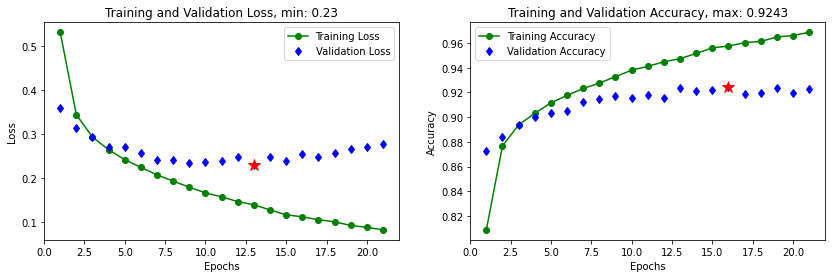

In [ ]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **CNN2 + FCN3**

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),filters= 64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
mc_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=5, 10, 20, 50

In [ ]:
hist = c2f3.fit(X_train, y_train, epochs=500, batch_size =100, 
         callbacks=[mc_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
600/600 [==============================] - 7s 11ms/step - loss: 0.6209 - accuracy: 0.7731 - val_loss: 0.3834 - val_accuracy: 0.8595
Epoch 2/500
600/600 [==============================] - 6s 10ms/step - loss: 0.3822 - accuracy: 0.8648 - val_loss: 0.3142 - val_accuracy: 0.8852
Epoch 3/500
600/600 [==============================] - 6s 10ms/step - loss: 0.3207 - accuracy: 0.8849 - val_loss: 0.2916 - val_accuracy: 0.8968
Epoch 4/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2900 - accuracy: 0.8953 - val_loss: 0.2698 - val_accuracy: 0.9017
Epoch 5/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2677 - accuracy: 0.9035 - val_loss: 0.2736 - val_accuracy: 0.9008
Epoch 6/500
600/600 [==============================] - 6s 10ms/step - loss: 0.2471 - accuracy: 0.9109 - val_loss: 0.2573 - val_accuracy: 0.9058
Epoch 7/500
600/600 [==============================] - 6s 11ms/step - loss: 0.2296 - accuracy: 0.9166 - val_loss: 0.2636 - val_accuracy:

In [ ]:
 c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.2800 - accuracy: 0.9212


[0.2800443768501282, 0.9211999773979187]

## Graph of loss and accuracy
- model: C2F3

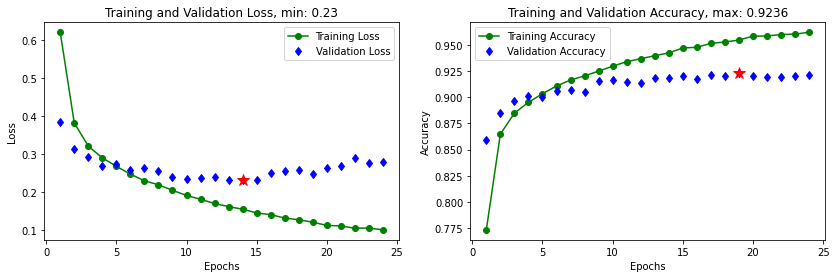

In [ ]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
score1=c2f2.evaluate(X_test, y_test, batch_size = 100)
score2=c2f3.evaluate(X_test, y_test, batch_size = 100)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

100/100 [==============================] - 1s 6ms/step - loss: 0.2800 - accuracy: 0.9212


([0.27738064527511597, 0.2800443768501282],
 [0.9232000112533569, 0.9211999773979187])

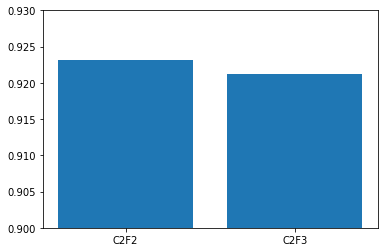

In [ ]:
x = np.arange(2)
cnns = ['C2F2','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.9,.93))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

## Best models
- c2f2: fmnist_c2f2_best_weights.016-0.9243.hdf5
- c2f3: fmnist_c2f3_best_weights.019-0.9236.hdf5

In [ ]:
from keras.models import load_model

model_best = load_model('fmnist_c2f2_best_weights.016-0.9243.hdf5')
model_best.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.2557 - accuracy: 0.9243


[0.2557410001754761, 0.9243000149726868]

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model_best.predict(X_test)

In [ ]:
predictions.shape   #predictions 할경우 one hot인코딩으로 값출력

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
# class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

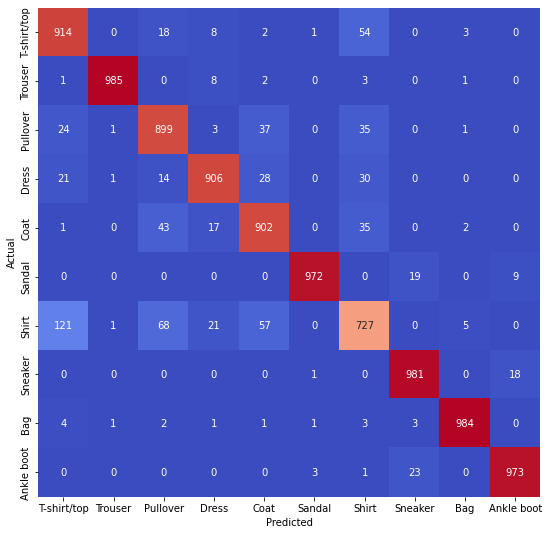

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---